##1. IMPORTING LIBRARIES

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


##2. LOAD THE DATASHEET

In [261]:
df=pd.read_csv("Mall_Customers.csv")

In [262]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [263]:
df.drop(columns=["Gender"],inplace = True)

In [264]:
df.tail()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18
199,200,30,137,83


##3.PERFORM BELOW VISUALIZATION

###UNIVARIATE

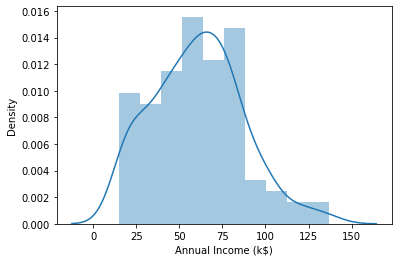

In [265]:
sns.distplot(df['Annual Income (k$)'])

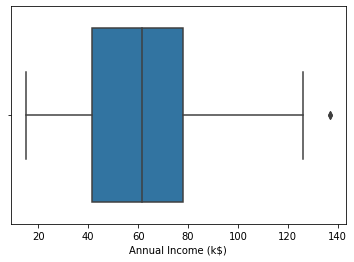

In [266]:
sns.boxplot(df["Annual Income (k$)"])

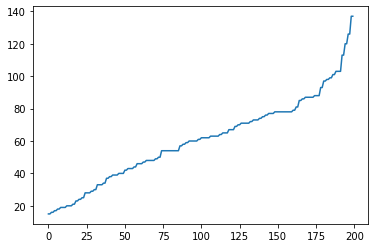

In [267]:
plt.plot(df['Annual Income (k$)'])
plt.show()

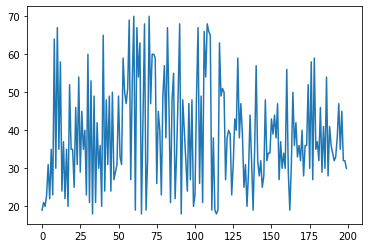

In [268]:
data=np.array(df['Age'])
plt.plot(data)

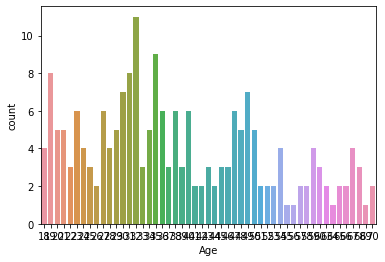

In [269]:
sns.countplot(df['Age'])

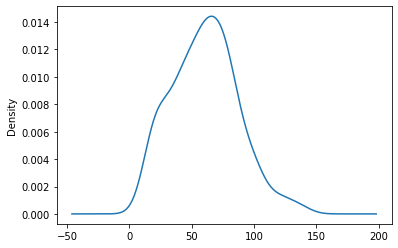

In [270]:
df['Annual Income (k$)'].plot(kind='density')

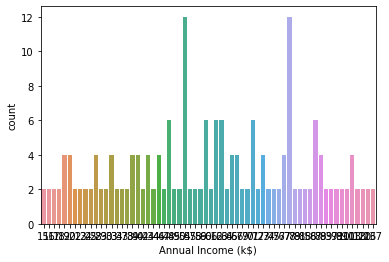

In [271]:
sns.countplot(df['Annual Income (k$)'])

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <a list of 10 Patch objects>)

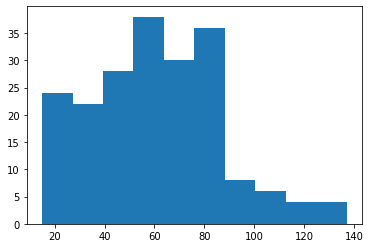

In [272]:
plt.hist(df['Annual Income (k$)'])

**BI-VARIATE ANALYSIS**

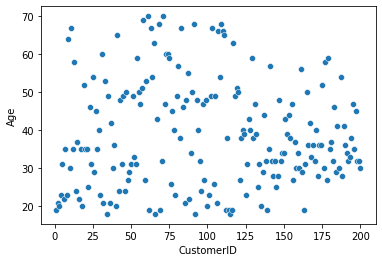

In [273]:
sns.scatterplot(df.CustomerID,df.Age)

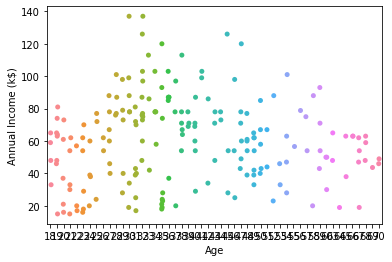

In [274]:
sns.stripplot(x=df['Age'],y=df['Annual Income (k$)'])

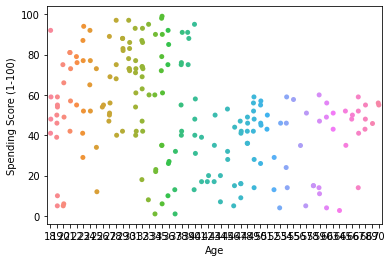

In [275]:
sns.stripplot(x=df['Age'],y=df['Spending Score (1-100)'])

Text(0, 0.5, 'Annual Income (k$)')

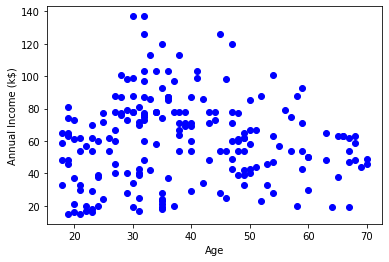

In [276]:
plt.scatter(df['Age'],df['Annual Income (k$)'],color='blue')
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")

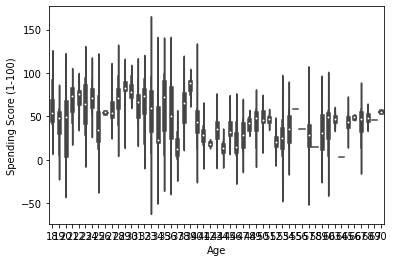

In [277]:
sns.violinplot(x ='Age', y ='Spending Score (1-100)', data = df)

**MULTIVARIENT ANALYSIS**

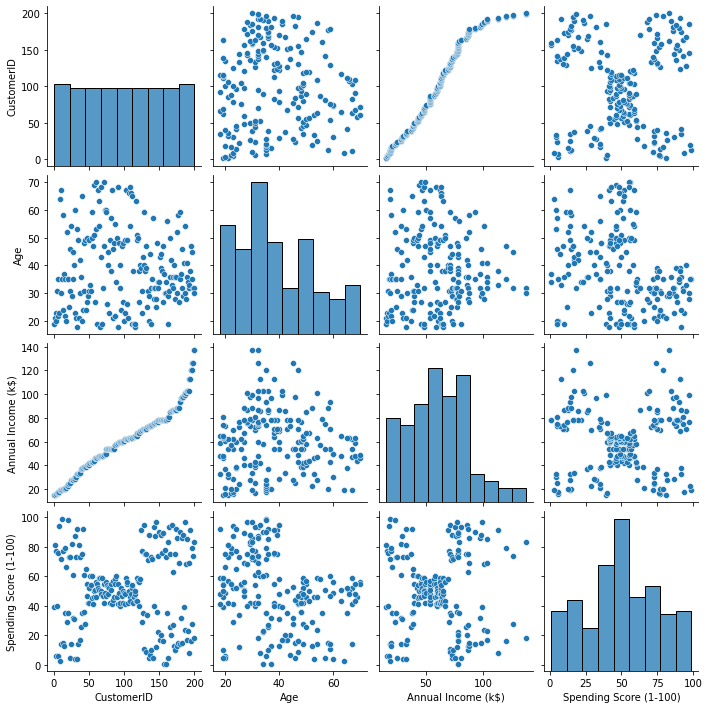

In [278]:
sns.pairplot(df)

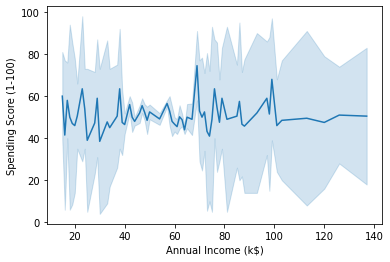

In [279]:
sns.lineplot(df['Annual Income (k$)'],df['Spending Score (1-100)'])

##4.PERFORM DESCRIPTIVE STATISTICS ON THE DATASET 

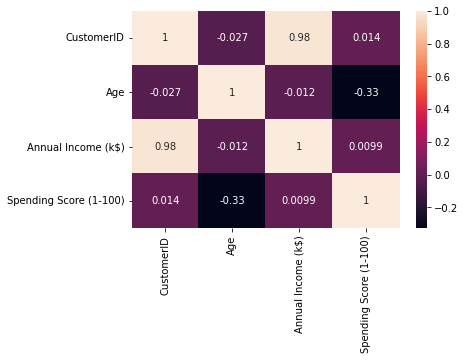

In [280]:
sns.heatmap(df.corr(),annot=True)

In [281]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [282]:
df.skew()

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [283]:
print("mean:",df['Spending Score (1-100)'].mean())
print("std:",df['Spending Score (1-100)'].median())
print("min:",df['Spending Score (1-100)'].mode())
print("max",df['Spending Score (1-100)'].std())
df.kurtosis()

mean: 50.2
std: 50.0
min: 0    42
dtype: int64
max 25.823521668370173


CustomerID               -1.200000
Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64

In [284]:
df.shape


(200, 4)

In [285]:
df.isnull().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [287]:
df.mean()

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [288]:
df.median()

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [289]:
df['Annual Income (k$)'].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64

##5.CHECKING FOR MISSING VALUES AND DEAL WITH THEM 

In [290]:
df.isna().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [291]:
df.isnull().any()

CustomerID                False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [292]:
df.isnull().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

##6.FIND THE OUTLIERS AND REPLACE THE OUTLIERS

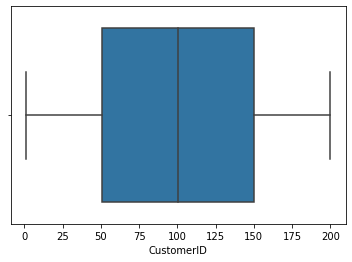

In [293]:
sns.boxplot(df.CustomerID)

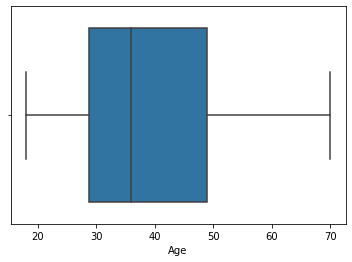

In [294]:
sns.boxplot(df.Age)


In [295]:
iq=df.quantile(q=[0.75,0.25])
iq


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.75,150.25,49.00,78.0,73.00
0.25,50.75,28.75,41.5,34.75


In [296]:
iq.iloc[0]
iq.iloc[1]
IQR = iq.iloc[0] - iq.iloc[1]
upper_extrem = iq.iloc[0] + ( 1.5 * IQR)  
lower_extrem = iq.iloc[1] - ( 1.5 * IQR)   
upper_extrem

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [297]:
lower_extrem

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

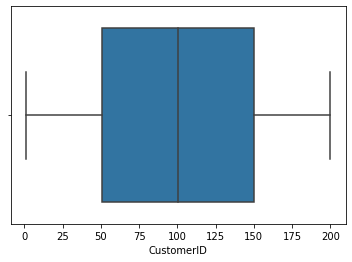

In [298]:
sns.boxplot(df.CustomerID)

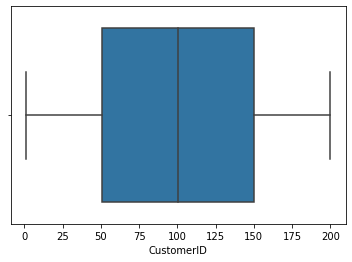

In [299]:
sns.boxplot(df.CustomerID)

#7.CHECK CATEGORICAL COLUMNS AND PERFORM ENCODING

In [300]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.main=le.fit_transform(df.CustomerID)
df.main


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [301]:
df.main=pd.get_dummies(df.CustomerID)
df.main

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [302]:
pd.get_dummies(df).tail()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18
199,200,30,137,83


In [303]:
numeric_data = df.select_dtypes(include=[np.number]) 
categorical_data = df.select_dtypes(exclude=[np.number]) 
print("Number of numerical variables: ", numeric_data.shape[1]) 
print("Number of categorical variables: ", categorical_data.shape[1])

Number of numerical variables:  4
Number of categorical variables:  0


In [304]:
print("Number of categorical variables: ", categorical_data.shape[1]) 
Categorical_variables = list(categorical_data.columns)
Categorical_variables

Number of categorical variables:  0


[]

In [305]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['Annual Income (k$)'])
df["Gender"] = label

In [306]:
df['Annual Income (k$)'].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64

##8.SCALING THE DATA

In [307]:
X = df.drop("Age",axis=1)
Y = df['Age']

In [308]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['Gender'])
df["Gender"] = label

In [309]:
df['Gender'].value_counts()

27    12
47    12
24     6
40     6
34     6
      ..
29     2
30     2
1      2
35     2
63     2
Name: Gender, Length: 64, dtype: int64

In [310]:
X = df.iloc[:,0:3]
print(X)

     CustomerID  Age  Annual Income (k$)
0             1   19                  15
1             2   21                  15
2             3   20                  16
3             4   23                  16
4             5   31                  17
..          ...  ...                 ...
195         196   35                 120
196         197   45                 126
197         198   32                 126
198         199   32                 137
199         200   30                 137

[200 rows x 3 columns]


In [311]:
Y = df.iloc[:14, 2].values
print(Y)

[15 15 16 16 17 17 18 18 19 19 19 19 20 20]


In [312]:
X = df.drop("Age",axis=1)
Y = df['Age']

In [313]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
scale = object.fit_transform(X) 
print(scale)

[[-1.72341210e+00 -1.73899919e+00 -4.34801480e-01 -1.88641296e+00]
 [-1.70609137e+00 -1.73899919e+00  1.19570407e+00 -1.88641296e+00]
 [-1.68877065e+00 -1.70082976e+00 -1.71591298e+00 -1.82738877e+00]
 [-1.67144992e+00 -1.70082976e+00  1.04041783e+00 -1.82738877e+00]
 [-1.65412920e+00 -1.66266033e+00 -3.95979919e-01 -1.76836459e+00]
 [-1.63680847e+00 -1.66266033e+00  1.00159627e+00 -1.76836459e+00]
 [-1.61948775e+00 -1.62449091e+00 -1.71591298e+00 -1.70934040e+00]
 [-1.60216702e+00 -1.62449091e+00  1.70038436e+00 -1.70934040e+00]
 [-1.58484630e+00 -1.58632148e+00 -1.83237767e+00 -1.65031622e+00]
 [-1.56752558e+00 -1.58632148e+00  8.46310024e-01 -1.65031622e+00]
 [-1.55020485e+00 -1.58632148e+00 -1.40534050e+00 -1.65031622e+00]
 [-1.53288413e+00 -1.58632148e+00  1.89449216e+00 -1.65031622e+00]
 [-1.51556340e+00 -1.54815205e+00 -1.36651894e+00 -1.59129203e+00]
 [-1.49824268e+00 -1.54815205e+00  1.04041783e+00 -1.59129203e+00]
 [-1.48092195e+00 -1.54815205e+00 -1.44416206e+00 -1.59129203e

In [314]:
from sklearn.preprocessing import StandardScaler

In [315]:
x = df[["Annual Income (k$)","Spending Score (1-100)"]]
scale = StandardScaler()
st_scale = scale.fit_transform(x)
st_scale

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [316]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range=(0,1))
norm = min_max.fit_transform(x)
norm

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

##11.Split the data into dependent and independent variables

In [317]:
X = df.iloc[:,0:3]
print(X)
Y = df.iloc[:14, 2].values
print(Y)

     CustomerID  Age  Annual Income (k$)
0             1   19                  15
1             2   21                  15
2             3   20                  16
3             4   23                  16
4             5   31                  17
..          ...  ...                 ...
195         196   35                 120
196         197   45                 126
197         198   32                 126
198         199   32                 137
199         200   30                 137

[200 rows x 3 columns]
[15 15 16 16 17 17 18 18 19 19 19 19 20 20]


##12. Split the data into training and testing

In [318]:
from sklearn.model_selection import train_test_split
y = df["Spending Score (1-100)"]
x = df.drop(columns = ["CustomerID"])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 4), (40, 4), (160,), (40,))

In [319]:
x_test

,Age,Annual Income (k$),Spending Score (1-100),Gender
95,24,60,52,31
15,22,20,79,5
30,60,30,4,12
158,34,78,1,47
128,59,71,11,40
115,19,65,50,36
69,32,48,47,24
170,40,87,13,52
174,52,88,13,53
45,24,39,65,17


In [320]:
y_test

95     52
15     79
30      4
158     1
128    11
115    50
69     47
170    13
174    13
45     65
66     50
182    15
165    75
78     52
186    24
177    69
56     50
152    20
82     41
68     59
124    29
16     35
148    22
93     40
65     59
60     56
84     57
67     48
125    77
132    34
9      72
18     29
55     41
75     54
150    17
104    56
135    88
137    73
164    26
76     53
Name: Spending Score (1-100), dtype: int64

In [321]:
x_train.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
79,49,54,42,27
197,32,126,74,62
38,36,37,26,15
24,54,28,14,10
122,40,69,58,38


In [322]:
x_test.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
95,24,60,52,31
15,22,20,79,5
30,60,30,4,12
158,34,78,1,47
128,59,71,11,40


In [323]:
x_test.shape,x_train.shape

((40, 4), (160, 4))

##13. Build the model

In [324]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [325]:
model = DecisionTreeClassifier()
R_model  = RandomForestClassifier()
log_reg = LogisticRegression()
nb = GaussianNB()

In [326]:
model.fit(x_train,y_train)
R_model.fit(x_train,y_train)
log_reg.fit(x_train,y_train)
nb.fit(x_train,y_train)


GaussianNB()

In [327]:
pred1 = model.predict(x_test)
pred2= log_reg.predict(x_test)
pred3=R_model.predict(x_test)
pred4 = nb.predict(x_test)
pred1,pred2,pred3,pred4

(array([54, 81,  4,  1, 14, 50, 47, 17, 14, 66, 50, 17, 75, 54, 15, 68, 50,
        20, 41, 59, 23, 35, 23, 40, 59, 56, 57, 48, 77, 35, 66, 28, 41, 54,
        17, 56, 87, 73, 28, 52]),
 array([91, 81,  4,  1, 14, 74, 55, 10, 14, 73, 55, 16, 72, 91, 17, 86, 55,
        20, 35, 75, 42, 55, 27, 42, 83, 52, 91, 52, 75, 69, 98, 31, 42, 55,
        20, 55, 93, 75, 17, 55]),
 array([50, 77,  4,  1,  9, 48, 47, 10, 14, 61, 51, 16, 75, 51, 14, 68, 52,
        20, 42, 59, 40, 35, 12, 42, 59, 56, 55, 48, 75, 40, 73, 15, 42, 55,
        16, 59, 87, 71, 35, 51]),
 array([52, 77,  5,  1, 10, 50, 47, 14, 14, 61, 50, 14, 75, 52, 28, 73, 50,
        17, 41, 59, 28, 35, 17, 40, 59, 56, 56, 48, 77, 35, 73, 28, 41, 54,
        17, 56, 88, 73, 28, 52]))

##14. Train the model

In [328]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [329]:
tr_pred1=model.predict(x_train)
a=accuracy_score(y_train,tr_pred1)
print("Accuracy_score",a)

Accuracy_score 1.0


In [330]:
tr_pred2=R_model.predict(x_train)
a=accuracy_score(y_train,tr_pred2)
print("Accuracy_score",a)

Accuracy_score 1.0


In [331]:
tr_pred3=log_reg.predict(x_train)
a=accuracy_score(y_train,tr_pred3)
print("Accuracy_score",a)

Accuracy_score 0.4


In [332]:
tr_pred4=nb.predict(x_train)
a=accuracy_score(y_train,tr_pred4)
print("Accuracy_score",a)

Accuracy_score 1.0


##15. Test the model

In [333]:
tr_pred1=model.predict(x_test)
a=accuracy_score(y_test,tr_pred1)
print("Accuracy_score",a)

Accuracy_score 0.55


In [334]:

tr_pred2=R_model.predict(x_test)
a=accuracy_score(y_test,tr_pred2)
print("Accuracy_score",a)

Accuracy_score 0.25


In [335]:
tr_pred3=log_reg.predict(x_test)
a=accuracy_score(y_test,tr_pred3)
print("Accuracy_score",a)

Accuracy_score 0.075


In [336]:
tr_pred4=nb.predict(x_test)
a=accuracy_score(y_test,tr_pred4)
print("Accuracy_score",a)

Accuracy_score 0.55


##16. Measure the performance using Evaluation metrices

In [337]:
print("Accuracy score :",accuracy_score(y_test,pred1))
print("Precision score :",precision_score(y_test,pred1,average="macro"))
print("Confustion matrix :",confusion_matrix(y_test,pred1))

Accuracy score : 0.55
Precision score : 0.3888888888888889
Confustion matrix : [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [338]:
print("Accuracy score :",accuracy_score(y_test,pred2))
print("Precision score :",precision_score(y_test,pred2,average="macro"))
print("Confustion matrix :",confusion_matrix(y_test,pred2))

Accuracy score : 0.075
Precision score : 0.05434782608695652
Confustion matrix : [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [339]:
print("Accuracy score :",accuracy_score(y_test,pred3))
print("Precision score :",precision_score(y_test,pred3,average="macro"))
print("Confustion matrix :",confusion_matrix(y_test,pred3))

Accuracy score : 0.25
Precision score : 0.16287878787878787
Confustion matrix : [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [340]:
print("Accuracy score :",accuracy_score(y_test,pred4))
print("Precision score :",precision_score(y_test,pred4,average="macro"))
print("Confustion matrix :",confusion_matrix(y_test,pred4))

Accuracy score : 0.55
Precision score : 0.35135135135135137
Confustion matrix : [[1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]]


##9. Clustering Algorithm

In [341]:
x = df.iloc[:, [3, 4]].values 

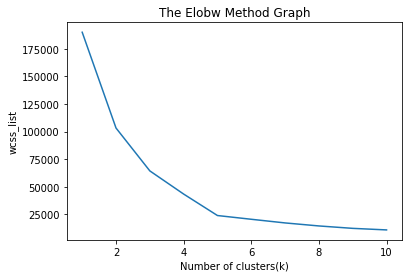

In [342]:
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [343]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x) 

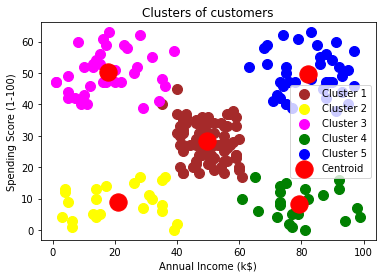

In [344]:
#visulaizing the clusters  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'brown', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'magenta', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'green', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'blue', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  